In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'/home/beans/bespoke')

from constants import *
from imports import *
from viz_utils import *
from train_utils import *
from input_prep import *
from traj_utils import *

/home/beans/anaconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:689: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(
/home/beans/anaconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:965: FutureWarning: This class has been deprecated. Please use ImageCompression
  warnings.warn(


### Seq from real

In [4]:
sorted(glob.glob("/media/beans/ssd/bespoke_logging/*"))
#sorted(glob.glob("/home/beans/bespoke_logging/*"))

['/media/beans/ssd/bespoke_logging/run_351',
 '/media/beans/ssd/bespoke_logging/run_352',
 '/media/beans/ssd/bespoke_logging/run_353',
 '/media/beans/ssd/bespoke_logging/run_354',
 '/media/beans/ssd/bespoke_logging/run_355',
 '/media/beans/ssd/bespoke_logging/run_356',
 '/media/beans/ssd/bespoke_logging/run_357',
 '/media/beans/ssd/bespoke_logging/run_358',
 '/media/beans/ssd/bespoke_logging/run_359',
 '/media/beans/ssd/bespoke_logging/run_359a',
 '/media/beans/ssd/bespoke_logging/run_359b',
 '/media/beans/ssd/bespoke_logging/run_360',
 '/media/beans/ssd/bespoke_logging/run_361',
 '/media/beans/ssd/bespoke_logging/run_362',
 '/media/beans/ssd/bespoke_logging/run_363',
 '/media/beans/ssd/bespoke_logging/run_364',
 '/media/beans/ssd/bespoke_logging/run_365',
 '/media/beans/ssd/bespoke_logging/run_366',
 '/media/beans/ssd/bespoke_logging/run_367',
 '/media/beans/ssd/bespoke_logging/run_368',
 '/media/beans/ssd/bespoke_logging/run_369',
 '/media/beans/ssd/bespoke_logging/run_370',
 '/media

In [5]:
##run_id = "run_494" # to mid nabq and back via timber trail, silver falls highway, quall, madrona, ev. Cloudy.  
##run_id = "run_498" # back from end nabq via tt, pc, sfh, quall, madrona
#run_id = "run_502" # out to nabq start
#run_id = "run_503" # nabq out
# run_id = "run_504" # back from nabq
#run_id = "run_511"
run_id = "run_513" # out and back from nabq
run_id = "run_520" # rr out and back, snowy patch roads
run_id = "run_521a" # down to Boulder

run_path = f"/media/beans/ssd/bespoke_logging/{run_id}"
#run_path = f"/home/beans/bespoke_logging/{run_id}"

model_stem = "11.16_avg" #"8.18_e34" nabq back on tt sfh

In [6]:
aux_paths = sorted(glob.glob(f"{run_path}/aux/*"))
img_paths = sorted(glob.glob(f"{run_path}/img/*"))
car_state_paths = sorted(glob.glob(f"{run_path}/car_state/*"))
m = min([len(aux_paths), len(img_paths), len(car_state_paths)])
len(aux_paths), len(img_paths), len(car_state_paths), m

(35000, 35000, 35000, 35000)

In [ ]:
s, e = 0, -100 #-100 #9400, 11_400 #4000
#e = m

aux = np.stack([np.load(f) for f in aux_paths[s:e]]).astype(np.float16)
img = np.stack([np.load(f) for f in sorted(glob.glob(f"{run_path}/img/*"))[s:e]]).astype(np.uint8)
car_state = np.stack([np.load(f) for f in sorted(glob.glob(f"{run_path}/car_state/*"))[s:e]])#.astype(np.float16)

steer_angle = np.radians(car_state[:,0] / (STEER_RATIO)) #*-1  
tire_angle_rad = steer_angle *-1
img.shape, aux.shape, car_state.shape

In [ ]:
#img = img[:,20:,:,:]
img.shape

In [ ]:
commanded_torque = car_state[:, 7]

In [ ]:
plt.hist(commanded_torque)[0]

In [ ]:
plt.figure(figsize=(20,2))
plt.plot(np.clip(commanded_torque, -10_000, 10_000))

In [ ]:
# abs torque limited
plt.figure(figsize=(20,2))
plt.plot(car_state[:, 9])

In [ ]:
commanded_td = car_state[:, 8]
plt.hist(np.clip(commanded_td, -10_000, 10_000))[0]

In [ ]:
plt.figure(figsize=(20,2))
plt.plot(np.clip(commanded_td, -6000, 6000))

In [ ]:
# Td limited
plt.figure(figsize=(20,2))
plt.plot(car_state[:, 10])

In [ ]:
# interesting note
plt.figure(figsize=(20,2))
plt.plot(car_state[:, 11])

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(car_state[:, 10], width=900, height=400)
fig.show()

In [ ]:
plt.imshow(img[2589])

In [ ]:
# seeing if cam is too slow, ie if we ever have repeated imgs

diffs = []
for i in range(len(img)-1):
    diff = (img[i] - img[i+1]).mean()
    diffs.append(diff)
    
# whether or not image is same as prev img, ie cam is slow. We just don't want to see zeros
plt.figure(figsize=(20,2))
plt.plot(diffs)

In [ ]:
# timespan btwn start to get img, and publish plan, ie the timespan WE have control over
# img staleness
plt.hist(car_state[:,2], bins=20)

In [ ]:
b,e = 0, -1
img = img[b:e]
aux = aux[b:e]
car_state = car_state[b:e]
steer_angle = steer_angle[b:e]
img.shape, aux.shape, car_state.shape, steer_angle.shape, #pred.shape

In [ ]:
torque = np.degrees(steer_angle) * (aux[:,2]**2)
plt.hist(torque)

In [ ]:
plt.hist(torque[1:]-torque[:-1])

In [ ]:
plt.scatter(torque, aux[:,2])

In [ ]:
# img staleness
plt.figure(figsize=(20,2))
plt.plot(car_state[100:,2])

In [ ]:
# loop duration
plt.figure(figsize=(20,2))
plt.plot(car_state[100:,3])

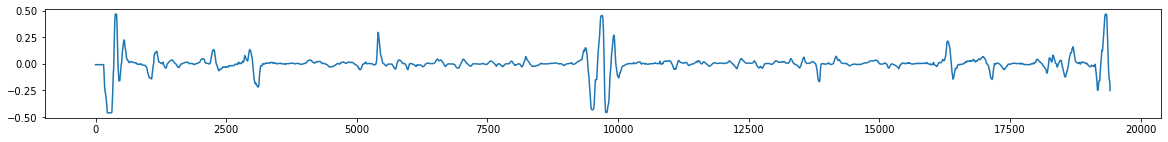

In [77]:
# steer angle
plt.figure(figsize=(20,2))
plt.plot(steer_angle)

In [78]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x=range(len(steer_angle)), y=steer_angle, width=900, height=400)
fig.show()

(array([ 248.,   67.,  165.,  566., 9943., 7531.,  511.,  173.,   59.,
         153.]),
 array([-0.46207593, -0.36912623, -0.27617654, -0.18322685, -0.09027716,
         0.00267253,  0.09562222,  0.18857192,  0.28152161,  0.3744713 ,
         0.46742099]),
 <BarContainer object of 10 artists>)

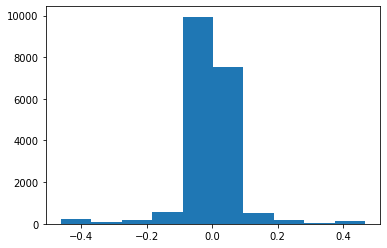

In [79]:
plt.hist(steer_angle)

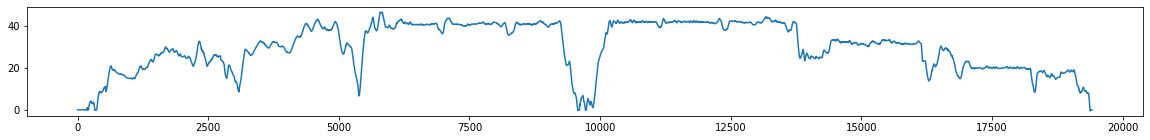

In [80]:
# speed
plt.figure(figsize=(20,2))
plt.plot(aux[:,2])

(array([ 686.,  446.,  474., 1552., 2442., 2026., 2875., 1032., 5869.,
        2014.]),
 array([-0.487,  4.223,  8.94 , 13.65 , 18.36 , 23.06 , 27.78 , 32.5  ,
        37.2  , 41.9  , 46.62 ], dtype=float16),
 <BarContainer object of 10 artists>)

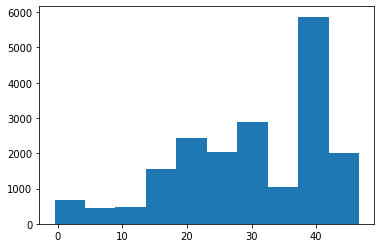

In [81]:
# speed
plt.hist(aux[:,2])

In [82]:
"""import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x=kph_to_mph(aux[:, 2]), y=np.sqrt(1/abs(steer_angle+.001)), width=600, height=600)
#fig.update_xaxes(range=[0, 50])
fig.update_yaxes(range=[0, 12])
fig.show()
"""
# The speed you can go is a linear fn of sqrt(1/curvature), steer_angle is a linear fn of curvature, given wheelbase

'import plotly.express as px\nimport plotly.graph_objects as go\n\nfig = px.scatter(x=kph_to_mph(aux[:, 2]), y=np.sqrt(1/abs(steer_angle+.001)), width=600, height=600)\n#fig.update_xaxes(range=[0, 50])\nfig.update_yaxes(range=[0, 12])\nfig.show()\n'

In [83]:
MAX_ACCEL

0.6

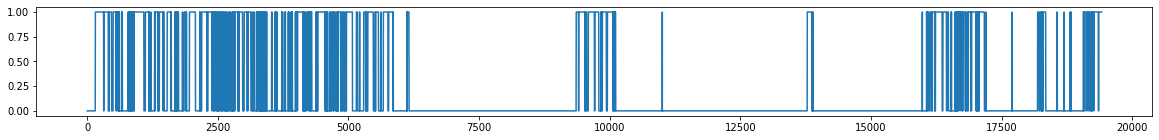

In [84]:
# steeringWheelPressed
plt.figure(figsize=(20,2))
plt.plot(car_state[:,4])

(array([ 9138928.,    88633.,   631449.,  1748967.,  3555706.,  6112383.,
        10269772., 14623137., 15961533., 12442292.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

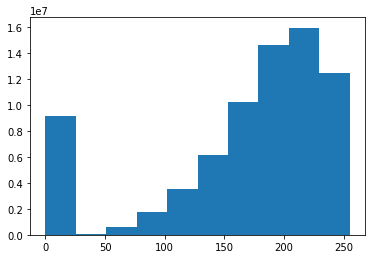

In [85]:
plt.hist(img[::20,:,:,2].flatten())

In [86]:
img.mean()

173.3303035518655

In [87]:
"""for i in range(len(img)):
    img[i] = gamma_correct_auto(img[i])"""

'for i in range(len(img)):\n    img[i] = gamma_correct_auto(img[i])'

<BarContainer object of 10 artists>

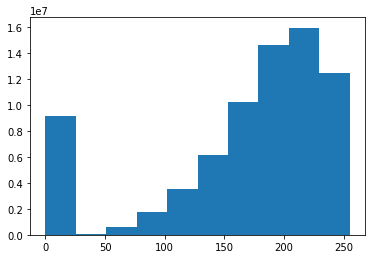

In [88]:
plt.hist(img[::20,:,:,2].flatten())[2]

In [89]:
"""for i in range(len(img)):
    img[i] = img[0] #np.concatenate([img[0].mean(axis=-1, keepdims=True) for _ in range(3)], axis=-1)    
    aux[i, 2] = 80"""

'for i in range(len(img)):\n    img[i] = img[0] #np.concatenate([img[0].mean(axis=-1, keepdims=True) for _ in range(3)], axis=-1)    \n    aux[i, 2] = 80'

In [90]:
img.shape

(19416, 120, 640, 3)

In [91]:
aux[:,0] = 0 #-1.0 #-.5
aux[:,1] = .5

In [92]:
rollout_data = make_vid(run_id, model_stem, img, aux)

(19416, 30) (19416, 1, 15, 80) (19416, 1, 15, 80)
240 690 3


/home/beans/bespoke/viz_utils.py:59: RuntimeWarning:

invalid value encountered in true_divide



Made vid!


In [ ]:
wp_angles_all, wp_headings_all, wp_curvatures_all, obsnet_outs, cnn_activations, cnn_grads, rnn_activations, rnn_grads = rollout_data

In [ ]:
plt.imshow(img[11_800])

In [55]:
# pitch

plt.figure(figsize=(20,2))
plt.plot(obsnet_outs[:,1])

NameError: name 'obsnet_outs' is not defined

<Figure size 1440x144 with 0 Axes>

In [45]:
obsnet_outs[:,1][:].mean()

-0.1329

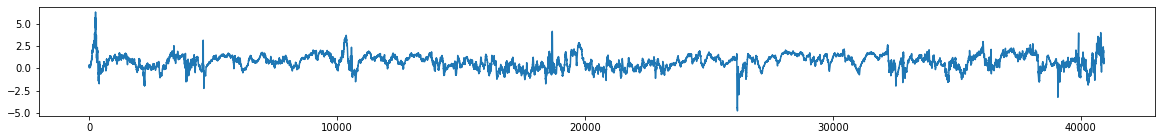

In [46]:
# yaw
plt.figure(figsize=(20,2))
plt.plot(obsnet_outs[:,2])

In [47]:
obsnet_outs[:,2][:15_000].mean()

0.853

In [48]:
%%time
combine_vids(model_stem, "9.24_avg", run_id)

combined!
CPU times: user 2min 6s, sys: 1.73 s, total: 2min 8s
Wall time: 2min 8s
